<font color="darkblue"> Prática 02: Maquinas de Vetor de Suporte - dados reais </font>

**Objetivos:**

*   Experimento com o algoritmo de Máquinas de Vetor de Suporte utilizando dados reais;
*   Aplicar a validação cruzada com os parâmetros *C* e *gamma* do algoritmo. 

**Atividade 1:**

1. Dados sobre 3 tipos de lírios (flores) para serem classificados, disponível em:  https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris 
2. Carregar os dados usando a função *load_iris* do pacote  *sklearn.datasets*.

    

In [1]:
# load the iris dataset 
from sklearn.datasets import load_iris 
iris = load_iris() 

**Atividade 2:**

1. Plotar as 2 primeiras características dos dados em um grafico de disprsão, exibindo cores distints para cada tipo de flor.


150


Text(0, 0.5, 'Sepal width')

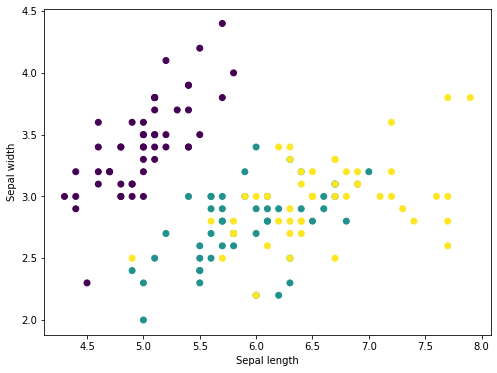

In [2]:
import matplotlib.pyplot as plt

# store the feature matrix (X) and response vector (y) 
X = iris.data 
y = iris.target 
print(len(y))
plt.figure(2, figsize=(8, 6))


# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

**Atividade 3:**

1. Dividir entrada em dados de treino e teste.

In [3]:
# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 


**Atividade 4:**
1. Utilizar a classe *SVC* do pacote *sklearn.svm* para ajustar com os dados de treino;
2. Utilizar a classe *GridSearch* do pacote *sklearn.model_selection* para realizar o método de validação cruzada, variando os parâmetros *C* e *gamma* do algoritmo SVM.

In [4]:
# training the model on training set 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5]}
grid = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=param_grid, cv=5)

%time grid.fit(x_train, y_train)
print(grid.best_params_)


CPU times: user 264 ms, sys: 0 ns, total: 264 ms
Wall time: 267 ms
{'C': 5, 'gamma': 0.05}


**Atividade 5:**

1. Computar as métricas de aprendizado com os dados de teste.

In [9]:
# comparing actual response values (y_test) with predicted response values (y_pred) 
from sklearn.metrics import classification_report, accuracy_score

clf = grid.best_estimator_

# making predictions on the testing set 
y_pred = clf.predict(x_test) 
print(y_pred)


print('Ein: %0.4f' % (1 - accuracy_score(y_train, clf.predict(x_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(x_test))))
print(classification_report(y_test, y_pred))

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
Ein: 0.0190
Eout: 0.0222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

